In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
TRAIN_FILE = 'data/train.tsv'

In [3]:
df = pd.read_csv(TRAIN_FILE,sep='\t')

In [4]:
df.head()

,gold_label,premise,hypothesis,language
0,neutral,"At ground level, the asymmetrical cathedral is...",It's hard to find a dramatic view of the cathe...,en
1,contradiction,Hanuman is a beneficent deity predating classi...,Hanuman declared that all the lemurs here need...,en
2,contradiction,All other spending as well as federal revenue ...,None of the federal spending is assumed to grow,en
3,neutral,uh-huh that's interesting well it sounds as th...,That information about graduation rates is int...,en
4,neutral,Some kind of instant recognition on his father...,Did his father recognize him?,en


In [12]:
df[df.hypothesis.isnull() == True]

,gold_label,premise,hypothesis,language
584,neutral,Saint-Germain-des-Pr??s,NaN,en
34354,contradiction,"Native 'Me win, me passum heap big law ...",NaN,en
36759,contradiction,Vend??me Op??ra Madeleine,NaN,en
38668,neutral,Tony Shoes (so Clinton will have Shoes and So...,NaN,en
50243,entailment,Tony Shoes (so Clinton will have Shoes and So...,NaN,en
53185,entailment,yeah yeah not not uh no not the uh the area yo...,NaN,en
61404,neutral,Vienna Noise Choir,NaN,en
62099,contradiction,Wes Widmaier,NaN,en
62471,entailment,Wes Widmaier,NaN,en
73004,neutral,AICPA American Institute of Certified Public A...,NaN,en


In [23]:
df.language.value_counts()

en    100993
vi      1000
de      1000
ar      1000
es      1000
bg      1000
el      1000
th      1000
ru      1000
tr      1000
sw      1000
ur      1000
zh      1000
hi      1000
fr      1000
Name: language, dtype: int64

<AxesSubplot:xlabel='gold_label', ylabel='Count'>

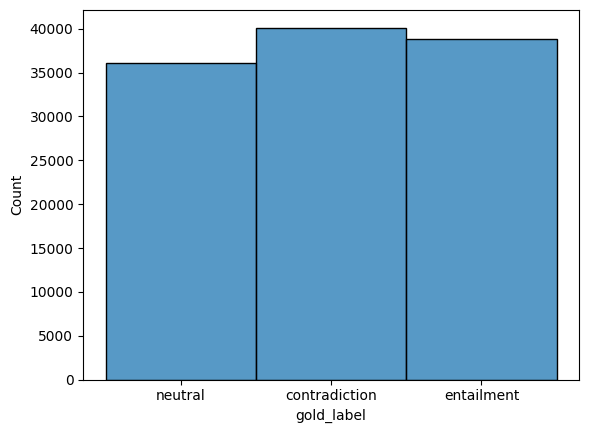

In [7]:
sns.histplot(df.gold_label)

In [72]:
df_hr = df[df.language == 'en']
df_lr = df[df.language != 'en']

<AxesSubplot:xlabel='gold_label', ylabel='Count'>

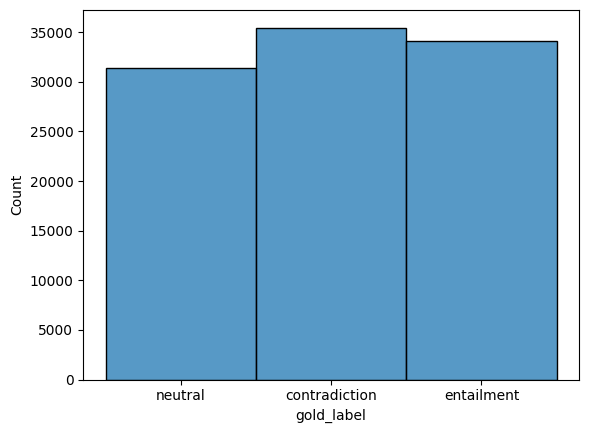

In [73]:
sns.histplot(df_hr.gold_label)

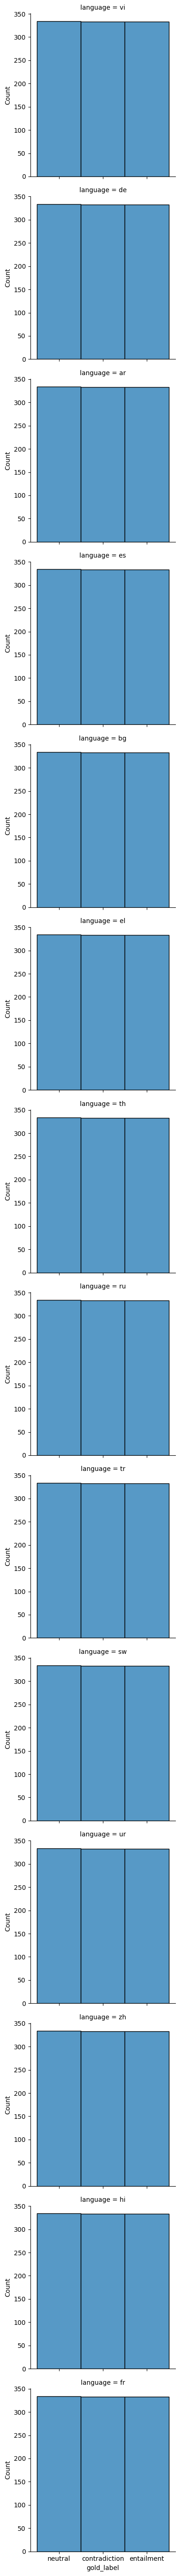

In [78]:
g = sns.FacetGrid(df_lr, row="language", height=4)
g.map(sns.histplot, "gold_label")